
<div align="center">
<h1>FYS 2021 Assigment 1</h1>
</div>

<div align="center">

A Study on Music Genre Classification using Logistic Regression

<h2>Petter Madsen</h2>

8 September 2024

</div>


In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Problem 1

In [309]:
#1a
SP = pd.read_csv("SpotifyFeatures.csv")  
#print(SP)                                                 # Reads .csv file
print(f"Songs: {len(SP.axes[0])}, song properties {len(SP.axes[1])}")     # Prints information about how many rows and columns the .csv file includes


Songs: 232725, song properties 18


a)
There are 232725 samples with 18 features in the dataset.

In [310]:
#1b
SP2 = pd.read_csv("SpotifyFeatures.csv",usecols = ["genre","liveness","loudness"]) # Reads .csv file and filters out unnused columns

SP2 = SP2.loc[(SP2['genre'] == 'Pop') | (SP2['genre'] == 'Classical')]  # Filters out unwanted song genre

SP2 = SP2.replace({'Pop':1, 'Classical':0})       # Renames Pop to value 1, and Classical to value 0 for classification purposes

len_classical = len(SP2.loc[SP2['genre'] == 0])  # Counts how many songs are classified as Classical
len_pop = len(SP2.loc[SP2['genre'] == 1])

print(f"Classical songs: {len_classical}, Pop songs: {len_pop}")  

Classical songs: 9256, Pop songs: 9386


b)
There are 9256 classical songs, and 9386 pop songs.

In [311]:
# Create the input matrix
X = SP2[['liveness', 'loudness']].values

# Create the target vector
Y = SP2['genre'].values

print(X)
print(Y)


[[  0.0762 -21.356 ]
 [  0.106  -34.255 ]
 [  0.0916 -28.215 ]
 ...
 [  0.0816 -25.843 ]
 [  0.105  -20.238 ]
 [  0.0953 -29.223 ]]
[0 0 0 ... 0 0 0]


In [312]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y) 
#stratify makes sure that the training and test sets have the same proportion of class labels as the input dataset

print(X_train)

print(y_train)

[[  0.101  -18.663 ]
 [  0.211  -14.334 ]
 [  0.0759 -18.204 ]
 ...
 [  0.111   -7.213 ]
 [  0.121  -21.863 ]
 [  0.0521  -4.328 ]]
[0 0 0 ... 1 0 1]


c)
The two generated arrays are looking like expected.

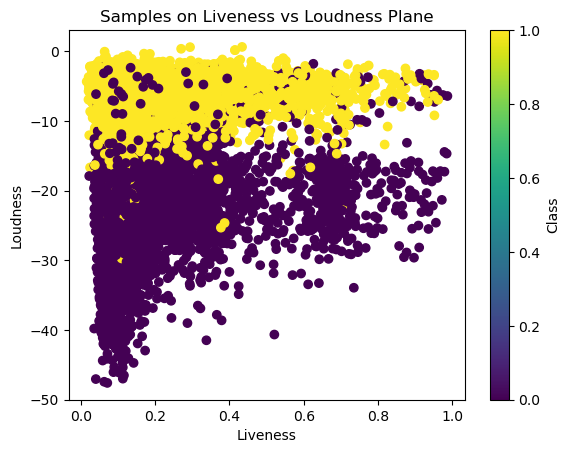

In [313]:
#1d
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis') # c is the color of the dots, cmap is the color map

plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Samples on Liveness vs Loudness Plane')

# Add a colorbar legend
plt.colorbar(label='Class')

plt.show()

d) We see from the plot that fair performing classification should be possible. Specially along the loudness axis there seem to be defined separation between the classes.

# Problem 2

In [314]:
#2a

# Define the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [315]:
def logistic_regression(X, y, learning_rate, n_epochs):
    # Initialize the weights and bias
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    
    # Initialize lists to store training error and accuracy
    training_error = []
    training_accuracy = []
    
    # Iterate through each epoch
    for epoch in range(n_epochs):
                
        # Iterate through each training sample
        for i in range(len(X)):
            # Compute the predicted class probabilities
            z = (X[i] @ weights) + bias
            y_pred = sigmoid(z)
            
            # Update the weights and bias using gradient descent
            error = y_pred - y[i]
            weights = weights - learning_rate * error * X[i]
            bias = bias - learning_rate * error
            
        # Calculate the training error and accuracy
        y_pred = sigmoid((X @ weights) + bias)
        training_error.append(np.mean(np.abs(y_pred - y)))
        training_accuracy.append(np.mean((y_pred >= 0.5) == y))
    
    return weights, bias, training_error, training_accuracy


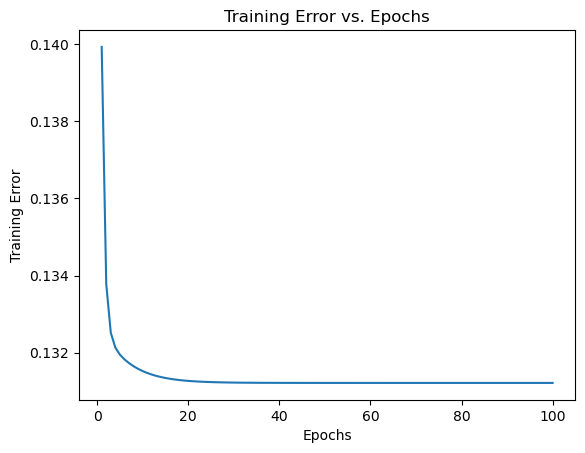

weights = [-1.65160436  0.53076298]
bias = 5.883908437897808


In [316]:
# Set the learning rate and number of epochs
learning_rate = 0.01
n_epochs = 100

# Train the logistic regression classifier
weights, bias, training_error, training_accuracy = logistic_regression(X_train, y_train, learning_rate, n_epochs)

# Plot the training error as a function of epochs
plt.plot(range(1, n_epochs+1), np.array(training_error))
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epochs')
plt.show()

print("weights =", weights)
print("bias =", bias)

a)
The training error is rapidly decreasing as number of epochs is increasing, as excepcted. At around 20 epochs the error seems to have stabilized.

In [317]:
accuracy = training_accuracy[-1]
print('Accuracy on the training set:', accuracy)

Accuracy on the training set: 0.9183933480855629


This is an acceptable accuracy.

In [318]:
learning_rates = [0.001, 0.01, 0.1, 1.0]  # Different learning rates to try

# Initialize empty lists to store training accuracies for each learning rate
training_accuracies = []

# Iterate through each learning rate
for learning_rate in learning_rates:
    # Train the logistic regression classifier
    weights, bias, training_error, training_accuracy = logistic_regression(X_train, y_train, learning_rate, n_epochs)
    
    # Append the training accuracy to the list
    training_accuracies.append(training_accuracy[-1])

# Print the results
for i in range(len(learning_rates)):
    print(f"Learning Rate: {learning_rates[i]}, Training Accuracy: {training_accuracies[i]}")



C:\Users\pette\AppData\Local\Temp\ipykernel_22828\3092525962.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Learning Rate: 0.001, Training Accuracy: 0.9224837390196473
Learning Rate: 0.01, Training Accuracy: 0.9183933480855629
Learning Rate: 0.1, Training Accuracy: 0.9152417353986455
Learning Rate: 1.0, Training Accuracy: 0.9212096828270636


The difference in accuracy for the different learning rates are relatively small. The best accuracy is found with a learning rate of 0.001. 

The training accuracy can vary for different learning rates because the learning rate determines the step size taken during the gradient descent optimization process. 

When the learning rate is too small, the algorithm takes small steps towards the optimal solution. This can result in slow convergence and the model may require more epochs to reach a good accuracy. On the other hand, if the learning rate is too large, the algorithm may overshoot the optimal solution and fail to converge. This can lead to unstable training and lower accuracy.

In [319]:
#2b

# Calculate the predicted class probabilities for the test set
y_pred_test = sigmoid((X_test @ weights) + bias)

# Convert the predicted probabilities to binary predictions
y_pred_test_class = (y_pred_test >= 0.5).astype(int)

# Calculate the accuracy on the test set
accuracy_test = np.mean(y_pred_test_class == y_test)

# Print the accuracy on the test set
print('Accuracy on the test set:', accuracy_test)

Accuracy on the test set: 0.9203539823008849


b)
Accuracy on the test set is on par with the train set. So we are happy with our classifier.

If there is a significant difference between the accuracy on the training and test set can be attributed to a phenomenon called overfitting. Overfitting occurs when a machine learning model performs extremely well on the training data but fails to generalize well to new, unseen data.

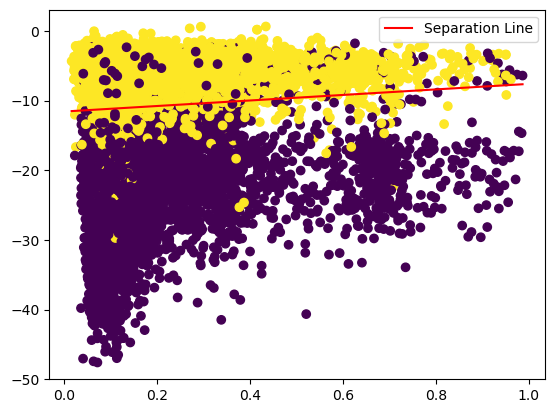

In [320]:
#2c
# Calculate the slope and y-intercept of the decision boundary line (ax+b)
slope = -weights[0] / weights[1]
intercept = -bias / weights[1]

# Generate x values for the decision boundary line
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)

# Calculate corresponding y values for the decision boundary line
y_values = slope * x_values + intercept

# Plot the decision boundary line
plt.plot(x_values, y_values, color='red', linestyle='-', label='Separation Line')

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

c)
The separation line make a good job of separating the classes. But as we see from the plot a linear line will not perfectly separate between the two classes. Perfect accuracy is not achievable here.

# P3

In [321]:
#a
mat = np.array([["TP", "FN"], ["FP", "TN"]])
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_class)

print("Confusion Matrix:")
print(mat)
print()
print(cm)

Confusion Matrix:
[['TP' 'FN']
 ['FP' 'TN']]

[[1676  175]
 [ 122 1756]]


b)
The confusion matrix provides more detailed information about the performance of the classifier on the test set compared to the accuracy score. It yields the number of true positives, true negatives, false positives, and false negatives. 

- True Positives (TP): The number of positive instances correctly predicted as positive.
- True Negatives (TN): The number of negative instances correctly predicted as negative.
- False Positives (FP): The number of negative instances incorrectly predicted as positive.
- False Negatives (FN): The number of positive instances incorrectly predicted as negative.

From these we can calculate both precision and recall. Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive, while recall measures the proportion of correctly predicted positive instances out of all actual positive instances. 

These can also be used to calculate an F1 score. This is usefull when class distribution is uneven and you need a measure that takes both false positive and false negative into account.